# PatchSim

In [1]:
import pandas as pd
import patchsim as sim
import numpy as np

### cfg.txt - Configuraciones

In [2]:
f = open("files/cfg.txt", "w")
f.write("""PatchFile=files/pop.txt
NetworkFile=files/net.txt
NetworkType=Static

ExposureRate=0.65
InfectionRate=0.67
RecoveryRate=0.4
WaningRate=0.03

SymptomaticProbability=0.2
AsymptomaticReduction=0.5
PresymptomaticReduction=0.5

ScalingFactor=0.01

SeedFile=files/seeds.txt
VaxFile=files/vaxs.txt
VaxDelay=0
VaxEfficacy=0

StartDate=1
Duration=400

LoadState=False
SaveState=False

OutputFile=resultados.out
OutputFormat=Whole
LogFile=proceso.log""")
f.close()

### pop.txt - path_df - Tamaño de poblaciones

In [3]:
localidades = pd.read_csv("files/info_local_2020.csv")

df = pd.DataFrame( {"id":localidades["local_id"].values, 
                    "pops":localidades["PopCDR"].values})

df.to_csv("files/pop.txt", header = False, index = False, sep=' ')
df

,id,pops
0,1,369936
1,2,152168
2,3,93928
3,4,257646
4,5,230318
5,6,124375
6,7,458427
7,8,730237
8,9,272242
9,10,617260


### net.txt - Theta - Matriz de viajes

In [4]:
redes = pd.read_csv("files/cdr_od_loc.csv")

df = pd.DataFrame( {"origen":redes["o_loc"].values, 
                    "destino":redes["d_loc"].values, 
                    "dia":np.zeros(len(redes), dtype=int),
                    "hbw":redes["hbw"].values})

df.to_csv("files/net.txt", header = False, index = False, sep=' ')
df.head(5)

,origen,destino,dia,hbw
0,1,1,0,247173.641026
1,1,2,0,36749.435897
2,1,3,0,4919.897436
3,1,4,0,17711.692308
4,1,5,0,13177.128205


### seeds.txt - Seed - Primeros infectados

In [5]:
# Semillas: 10 primeros dias
casos = pd.read_csv("files/osb_enftransm-covid-19_17042021.csv", nrows=732872, encoding='latin-1', delimiter=";")
casos["FECHA_DIAGNOSTICO"] = pd.to_datetime(casos["FECHA_DIAGNOSTICO"], format="%d/%m/%Y")  # Fecha diagnosticado.
dia0 = casos["FECHA_DIAGNOSTICO"].min()  # Primer caso de covid en Bogotá
dias = casos["FECHA_DIAGNOSTICO"] - dia0 # Dias
casos["dias"] = dias.dt.days 
casos = casos.rename(columns={"LOCALIDAD_ASIS": 'Localidad'})
datos = pd.merge(casos, localidades, on='Localidad')
group = datos.groupby(['dias', 'local_id']).size().reset_index(name='counts')
df = group[group["dias"]<=10]
df.to_csv("files/seeds.txt", header = False, index = False, sep=' ')
df

,dias,local_id,counts
0,0,1,1
1,4,10,2
2,6,8,1
3,6,9,1
4,7,2,1
5,7,10,3
6,7,11,1
7,7,13,1
8,8,2,1
9,8,9,1


### vaxs.txt - Vacunas - Primeros vacunados

In [6]:
# No hace nada aqui. En el código patchsim vaxs está comentado, sin embargo necesita recibir la entrada.
Id = localidades["local_id"].values
df = pd.DataFrame( {"dias": np.zeros(len(Id), dtype=int),
                    "Id": Id,
                    "vacunados":np.zeros(len(Id), dtype=int)}) 
df.to_csv("files/vaxs.txt", header = False, index = False, sep=' ')
df.head(5)

,dias,Id,vacunados
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


In [7]:
configs = sim.read_config('files/cfg.txt')
sim.run_disease_simulation(configs, write_epi=True)

625665

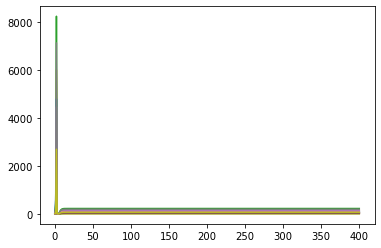

In [8]:
import matplotlib.pyplot as plt
Inf = np.loadtxt("resultados.out")
for i in Inf:
    plt.plot(i)